In [175]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [176]:
# Assuming the dataset is in a CSV file format
data = pd.read_csv("train.csv")

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   booking_number                        30000 non-null  int64  
 1   no_of_adults                          30000 non-null  int64  
 2   no_of_children                        30000 non-null  int64  
 3   no_of_weekend_nights                  30000 non-null  int64  
 4   no_of_week_nights                     30000 non-null  int64  
 5   type_of_meal_plan                     30000 non-null  int64  
 6   required_car_parking_space            30000 non-null  int64  
 7   room_type_reserved                    30000 non-null  int64  
 8   lead_time                             30000 non-null  int64  
 9   arrival_year                          30000 non-null  int64  
 10  arrival_month                         30000 non-null  int64  
 11  arrival_date   

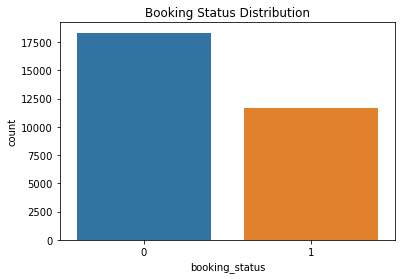

In [178]:
# Step 2: Exploratory Data Analysis (EDA)
sns.countplot(x="booking_status", data=data)
plt.title("Booking Status Distribution")
plt.show()

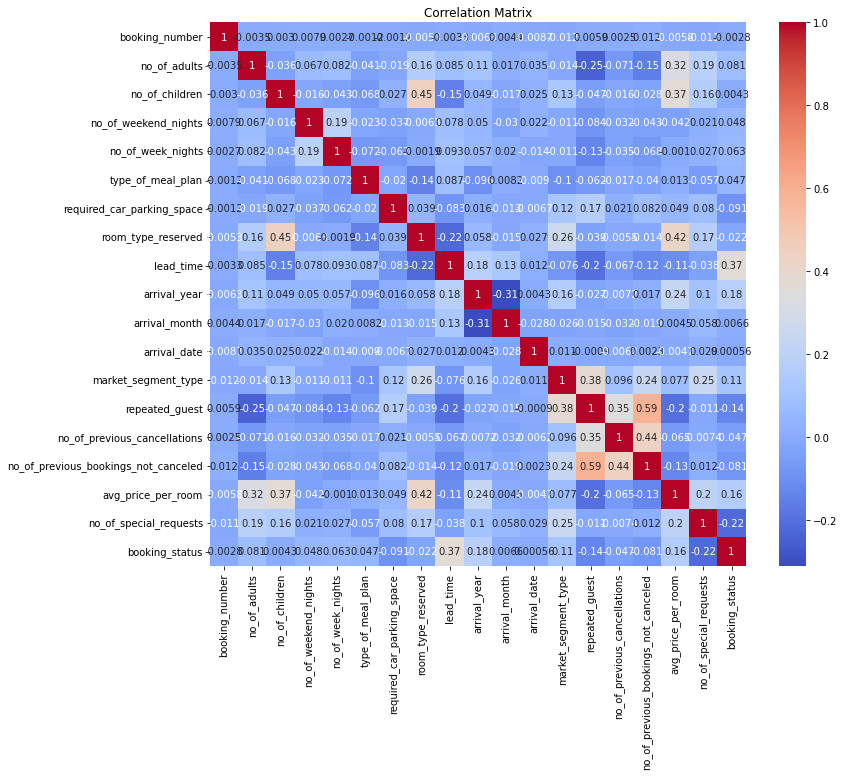

In [179]:
# Analyze the correlation between features and the target variable
corr_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [180]:
# Analyze the distribution of numerical features
numerical_features = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
                      'lead_time', 'avg_price_per_room']

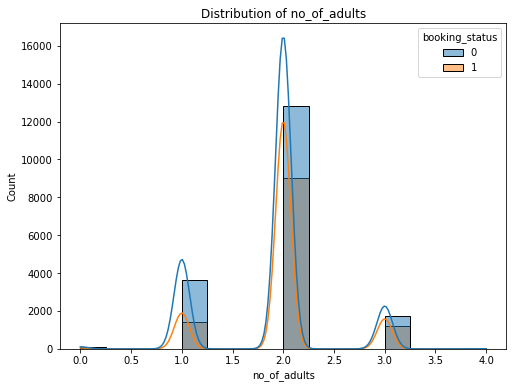

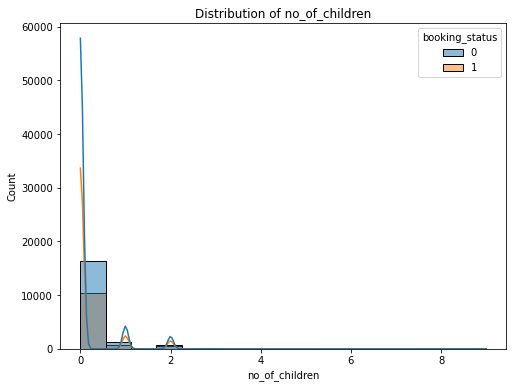

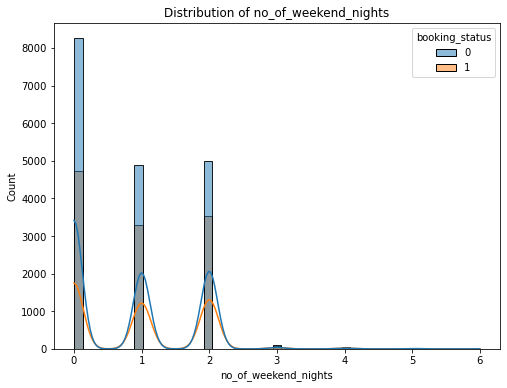

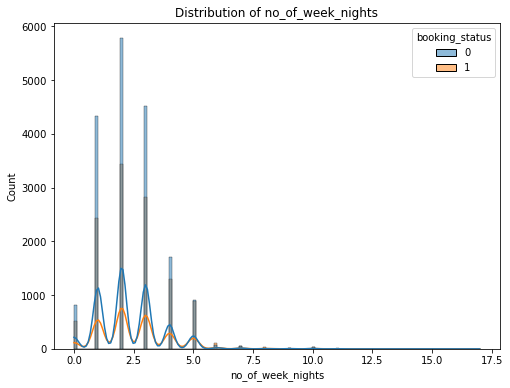

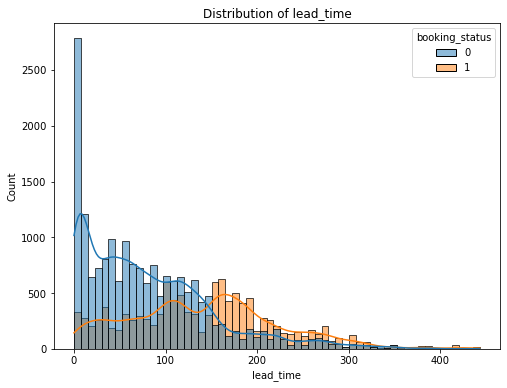

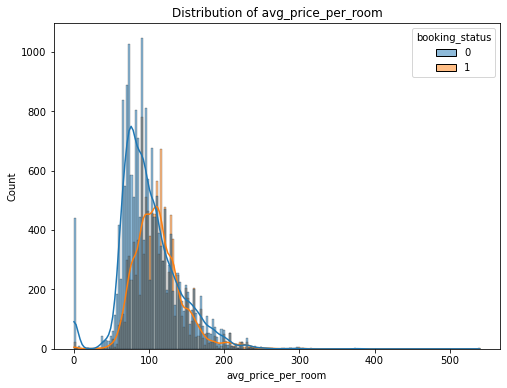

In [181]:
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=data, x=feature, hue="booking_status", kde=True)
    plt.title(f"Distribution of {feature}")
    plt.show()

In [182]:
# Step 3: Feature Selection
selected_features = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights',
                     'type_of_meal_plan', 'required_car_parking_space', 'room_type_reserved', 'lead_time',
                     'arrival_year', 'arrival_month', 'arrival_date', 'market_segment_type',
                     'repeated_guest', 'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
                     'avg_price_per_room', 'no_of_special_requests']

In [183]:
data = data[selected_features + ['booking_status']]

In [184]:
# Step 4: Handling missing values
missing_values = data.isnull().sum()
print("Missing Values:", missing_values)

Missing Values: no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


In [185]:
# If there are missing values, impute them with mean or median
imputer = SimpleImputer(strategy='mean')
data = imputer.fit_transform(data)

In [186]:
# Step 5: Split the data into features (X) and target variable (y)
X = data[:, :-1]
y = data[:, -1]

In [187]:
# Step 6: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [188]:
# Step 7: Feature selection using Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [189]:
# Select features based on feature importance
feature_importance = rf_model.feature_importances_
selector = SelectFromModel(rf_model, threshold="median", prefit=True)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

In [190]:
# Step 8: Hyperparameter tuning using GridSearchCV
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

In [191]:
# Define the parameter search space
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(1, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

# grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5)
## grid_search.fit(X_train_selected, y_train)

In [192]:
# Create a Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

In [193]:
# Perform random search
random_search = RandomizedSearchCV(rf_model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42)
random_search.fit(X_train_selected, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FE60868D60>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FE60868B20>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FE618F3550>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001FE61E90970>},
                   random_state=42)

In [194]:
# Get the best parameters found
best_params = random_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 8, 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 443}


In [195]:
# Train the final model with the best hyperparameters
final_model = RandomForestClassifier(**best_params, random_state=42)
final_model.fit(X_train_selected, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=3, min_samples_split=3,
                       n_estimators=443, random_state=42)

In [196]:
# Make predictions on the test set
y_pred = final_model.predict(X_test_selected)

In [197]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.8076666666666666


In [198]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)
print("AUC-ROC:", auc_roc)

Model Accuracy: 0.8076666666666666
Precision: 0.7765807962529274
F1 Score: 0.741834451901566
AUC-ROC: 0.7899570858079349


In [199]:
test_data = pd.read_csv("test.csv")

In [200]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   booking_number                        10000 non-null  int64  
 1   no_of_adults                          10000 non-null  int64  
 2   no_of_children                        10000 non-null  int64  
 3   no_of_weekend_nights                  10000 non-null  int64  
 4   no_of_week_nights                     10000 non-null  int64  
 5   type_of_meal_plan                     10000 non-null  int64  
 6   required_car_parking_space            10000 non-null  int64  
 7   room_type_reserved                    10000 non-null  int64  
 8   lead_time                             10000 non-null  int64  
 9   arrival_year                          10000 non-null  int64  
 10  arrival_month                         10000 non-null  int64  
 11  arrival_date    

In [201]:
# Step 3: Feature Selection
selected_features = ['lead_time', 'avg_price_per_room', 'arrival_date', 'no_of_special_requests',
                     'arrival_month', 'market_segment_type', 'no_of_week_nights', 'no_of_weekend_nights',
                     'no_of_adults']

In [202]:
# Step 4: Apply Feature Selection to the Test Data
test_data_selected = test_data[selected_features]

In [203]:
trained_model = RandomForestClassifier()  # Load the trained model
trained_model.fit(X_train_selected, y_train)

RandomForestClassifier()

In [204]:
y_pred_test = trained_model.predict(test_data_selected)

C:\Users\devil\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [205]:
test_data_selected.shape

(10000, 9)

In [206]:
len(y_pred_test)

10000

In [207]:
# Step 7: Concatenate Booking Number and Booking Status
booking_number = test_data['booking_number']
predictions = pd.DataFrame({'booking_number': booking_number, 'booking_status': y_pred_test})

In [208]:
# Step 8: Save the Predictions to CSV
predictions.to_csv("submission_hotel3.csv", index=False)